# ***Methodlodogy for Multi Linear Regression***

### Methodlodogy for Simple Linear Regression

1. Difinition
- Linear Regression methodology:
    - Simple Linear Regression: only 1 independent var Y = b0 + b1*X
    - Multi Linear Regression: More than one independent variable   
    Y = m0 + m1X1 + m2X2 + m3X3 + ... + mNXN
    - Polynomial Regression: independent variable of higher order than 1 (for example, order 2, 3)
- Logistic Reg: Classification Problem. (probability prediction of dependent variable based on independent variables.)

2. How Model works:
- In Linear Regression, we need to find the parameter set m_i (i from 0 to N) so that the function Y = f(X) best fits the training data set.

- The process of finding the model parameter: w0, w1, ..., wn set through the training process can use Gradient Descent, Stochastic Gradient Descent or Normal Equation methods by optimizing the MSE loss function.

MSE (Mean Squared Error) loss function formula```MSE = 1/n * (Yi - Ŷi)^2```
In there:
- Yi is the actual output value of the i-th data point;
- Ŷi is the output value predicted by the model with input Xi;
- n is the number of data points in the training set.

### Methodlodogy for Lasso and Ridge reg

1. Definition:
- Lasso and Ridge Regression are two regularization methods used to reduce overfitting in Linear Regression model.    
    - Lasso uses L1 regularization: to remove unimportant variables completely BY push the coefficients to zero completely.
    - Ridge uses L2 regularization: to remove unimportant variables incompletely BY push the coefficients close to zero, but never down to zero completely.    
- The choice between these two methods depends on THE NUMBER OF FEATURES AND INFLUENCE OF EACH FEATURE.

2. How model work? similar to Linear Regression with loss function.

And the formula for Lasso Regression loss function is:

$$MSE_{Lasso} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2 + \alpha \sum_{j=1}^{p} |w_j|$$

The formula for Ridge Regression loss function is:

$$MSE_{Ridge} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2 + \alpha \sum_{j=1}^{p} w_j^2$$



- $MSE$ is the mean squared error between the predicted values and the true values.
- $n$ is the number of training samples.
- $p$ is the number of features in the model.
- $y_i$ is the true value of the ith sample.
- $\hat{y_i}$ is the predicted value of the ith sample.
- $w_j$ is the weight corresponding to the jth feature in the model.
- $\alpha$ is the regularization parameter.

### Methodology for Grid Search and Randomized Search:
Grid Search (tìm kiếm theo lưới) and randomized search (tìm kiếm ngẫu nhiên) for hyperparameters tuning:
- are approaches to finding hyperparameters for machine learning models.
- Grid Search:    
    - Make sure to find the best solution.    
    - Easy reproducibility of results.    
    - It takes a lot of computation time when the model has many hyperparameters.
- Randomized Search in reverse. (fits multiple hyperparameters)

# ***Model Evaluation***


1. Model performance:
- Both Linear Regression, Ridge Reg with the best parameters, Lasso Reg with the best parameters all produce models with almost the same performance.
- The best model we trained was the SIMPLE Ridge regression model when the hyperparameters were not adjusted, the results are below:

| Metrics  | Train Set   | Test Set   |
|----------|-------------|------------|
| R2       | 0.9996      | 0.9991     |
| MSE      | 31.3317     | 35.1850    |
| RMSE     | 5.5975      | 5.9317     |
| MAE      | 3.3385      | 3.9744     |
| MAPE (%) | 0.2206      | 0.2672     |


2. Experiment:
We training with Lasso Regression and obtained Important features as below : ['GOLD_open', 'GOLD_low', 'copper', 'crude_oil', 'DXY', 'NLR'].
We tried training the model with the above input features but the model's performance did not improve much.

In [1]:
# Import Lib
from sklearn.linear_model import Ridge
from sklearn.model_selection import TimeSeriesSplit, train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import matplotlib.pyplot as plt

In [8]:
# Load and Preprocessing Data

# Load Data
import pandas as pd
# data = pd.read_csv("https://github.com/lavibula/GoldPricePrediction/blob/main/data/data_preparation/data_preparation.csv")
data = pd.read_csv("https://raw.githubusercontent.com/lavibula/GoldPricePrediction/main/data/data_preparation/data_preparation.csv")

# Use BTC_close_tomorrow -> y (Target col) of X_today, BTC_close_today -> 1 feature in X_today.
data["GOLD_close_tomor"] = data["GOLD_close"].shift(-1)
data = data.iloc[:-1] # data = data.drop(data.index[-1]) # Xóa hàng cuối
data

,Date,GOLD_open,GOLD_high,GOLD_low,GOLD_close,copper,crude_oil,DXY,EURUSD,MSCI,NASDAQ,NLR,platinum,RUT,silver,SP500,VIX,GOLD_close_tomor
0,2023-11-03,1993.5,2011.9,1989.3,1999.2,3.6815,80.51,105.02,1.0732,497.76,13478.28,71.36,944.3,1760.71,23.285,4358.34,14.91,1993.5
1,2023-11-02,1992.0,1999.2,1986.3,1993.5,3.6725,82.46,106.12,1.0622,487.02,13294.19,72.14,930.6,1714.21,22.846,4317.78,15.66,1987.5
2,2023-11-01,1993.3,2005.9,1978.2,1987.5,3.6490,80.44,106.88,1.0570,471.85,13061.47,70.98,930.4,1669.70,22.790,4237.86,16.87,1994.3
3,2023-10-31,2005.6,2017.7,1987.4,1994.3,3.6490,81.02,106.66,1.0578,471.55,12851.24,69.93,944.9,1662.28,22.952,4193.80,18.14,2005.6
4,2023-10-30,2013.5,2016.8,1999.7,2005.6,3.6585,82.31,106.12,1.0617,481.99,12789.48,68.35,939.9,1647.29,23.396,4166.82,19.75,1998.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3417,2010-04-09,1151.8,1165.8,1150.4,1161.9,3.5900,84.92,81.09,1.3501,36.62,2454.05,70.02,1727.4,702.95,18.351,1194.37,16.14,1152.9
3418,2010-04-08,1150.2,1154.7,1144.4,1152.9,3.5865,85.39,81.53,1.3361,36.19,2436.81,69.42,1717.1,699.64,18.127,1186.44,16.48,1153.0
3419,2010-04-07,1135.2,1154.2,1133.3,1153.0,3.5975,85.88,81.44,1.3345,37.31,2431.16,69.75,1723.2,699.46,18.199,1182.45,16.62,1136.0
3420,2010-04-06,1131.9,1139.6,1123.5,1136.0,3.6170,86.84,81.39,1.3400,37.37,2436.81,70.59,1704.5,701.48,17.931,1189.44,16.23,1133.8


In [10]:
# Đóng gói def Evaluate_Model and def Plot_Model
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

def Evaluate_Model(y_train, y_pred_train, y_test, y_pred_test):
  """
  parameters: `y_test`, `y_pred_test`
  calculates evaluation metrics,
    including R-squared, MSE, RMSE, MAE, MAPE,
      and directional accuracy (DA)
  """
# Đóng gói def Evaluate_Model and def Plot_Model
  print('EVALUATE METRICS ON THE TRAIN SET')
  print('Coefficient of determination R2:', r2_score(y_train, y_pred_train)) # print(model.score(X_test, y_train))
  print('Mean Squared Error MSE:', mean_squared_error(y_train, y_pred_train))
  print('Root Mean Squared Error RMSE:', np.sqrt(mean_squared_error(y_train, y_pred_train)))
  print('Mean Absolute Error MAE:', mean_absolute_error(y_train, y_pred_train))
  MAPE = mean_absolute_percentage_error(y_train, y_pred_train)
  # MAPE = np.mean(np.abs((np.array(y_train) - np.array(y_pred_train)) / y_train))
  print('Mean Absolute Percentage Error MAPE%', f"{round(MAPE*100, 4)}%", '\n')

  print('EVALUATE METRICS ON THE TEST SET')
  print('Coefficient of determination R2:', r2_score(y_test, y_pred_test)) # print(model.score(X_test, y_test))
  print('Mean Squared Error MSE:', mean_squared_error(y_test, y_pred_test))
  print('Root Mean Squared Error RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_test)))
  print('Mean Absolute Error MAE:', mean_absolute_error(y_test, y_pred_test))
  MAPE = mean_absolute_percentage_error(y_test, y_pred_test)
  # MAPE = np.mean(np.abs((np.array(y_test) - np.array(y_pred_test)) / y_test))
  print('Mean Absolute Percentage Error MAPE%', f"{round(MAPE*100, 4)}%")

def Plot_Model(y_test, y_pred_test, num_samples):
  """
  Scatter Plot(Biểu đồ phân tán) with x_axis: y_test, y_axis: y_pred_test
  Print test_pred_df
  Line Plot with x_axis: position point, y_axis: Value and 2 line: y_test, y_pred_test
  """
  # Gộp 2 Plot scatterplot and lineplot
  plt.subplots(figsize=(15,7)) # return tuple (Figure, Axes). obj Figure: toàn bộ hình ảnh, obj Axes: các vùng trực quan.
  ax1 = plt.subplot(121)
  ax2 = plt.subplot(122)

  # Scatter plot
  ax1.scatter(y_test, y_pred_test)
  ax1.set_title("Predictions vs Actual")  #plt.title
  ax1.set_xlabel("y_true")                #plt.xlabel
  ax1.set_ylabel("y_pred_test")           #plt.ylabel

  x = range(int(max(y_test))) #vẽ đường chéo giữa.
                              # type y_test from df: <class 'pandas.core.series.Series'>, tương tự df, but have only 1 col
  ax1.plot(x, 'r') # Opt speed, we can use x = np.arange(int(max(y_test))).astype(int)

  # Line plot with x_axis: position point, y_axis: Value and 2 line: y_test, y_pred_test
  #1 plot vẽ tập Test nhưng show ra x 6000 điểm -> vì plot ra index của hàng ban đầu.
  #2 Muốn plot ra tập sample với ít điểm giá trị hơn.
  #3 Muốn plot hiện điểm 1, 2, 3, ... chứ không phải điểm 0.0, 0.5, 1.0, ...
  test_pred_df = pd.DataFrame({'y_test': y_test, 'y_pred_test': y_pred_test}) # Create df 3 col: index, y_test, y_pred_test
  test_pred_subset_df = pd.DataFrame({'y_test_few': y_test[:num_samples], 'y_pred_test_few': y_pred_test[:num_samples]}) #2
  test_pred_subset_df = test_pred_subset_df.reset_index(drop=True) #1 Add a reset index and Remove old index

  # sns.lineplot(data=test_pred_subset_df) # data = df
  sns.lineplot(data=test_pred_subset_df).set(xticks=range(0, num_samples+1, int(num_samples/5)+1))
                                        # set x_axis ticks (dấu kiểm) hiện ít điểm hơn trên x
  ax2.set_title("Test Predictions")
  ax2.set_xlabel("Point") # tên hàng
  ax2.set_ylabel("Value")
  plt.show() # show những plots above

# y_train = [10 , 15, 20, 25, 30, 35, 40]
# y_pred_train = [-10, -15, -20, -25, -30, -35, -40]

# y_test = [10 , 15, 20, 25, 30, 35, 40]
# y_pred_test = [-10, -15, -20, -25, -30, -35, -40]
# Evaluate_Model(y_train, y_pred_train, y_test, y_pred_test)
# Plot_Model(y_test, y_pred_test, 6)

In [ ]:
# Split data for pre-train
X = data.drop(['GOLD_close_tomor', 'Date'], axis=1)
y = data['GOLD_close_tomor']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle = False) # shuffle: default: True, False sẽ giúp dùn qk để train và dự báo cho tương lai.


EVALUATE METRICS ON THE TRAIN SET
Coefficient of determination R2: 0.9996274006361086
Mean Squared Error MSE: 30.963886534632813
Root Mean Squared Error RMSE: 5.564520332843866
Mean Absolute Error MAE: 3.2356178989244775
Mean Absolute Percentage Error MAPE% 0.2171% 

EVALUATE METRICS ON THE TEST SET
Coefficient of determination R2: 0.999154568163479
Mean Squared Error MSE: 29.939964226387232
Root Mean Squared Error RMSE: 5.471742339181116
Mean Absolute Error MAE: 3.4662169797633635
Mean Absolute Percentage Error MAPE% 0.2284%


<ipython-input-10-c7c6ce8ae8fe>:41: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(121)


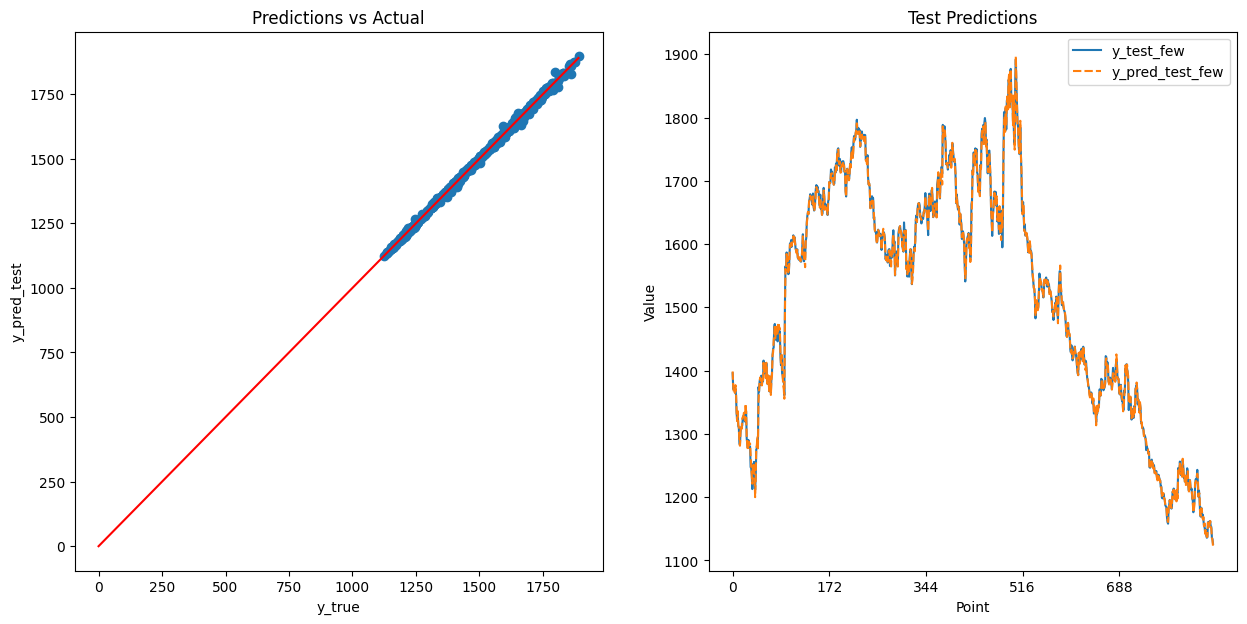

In [12]:
# Best Tuning Model - SIMPLE Ridge Regression when hyperparameters have not been adjusted
from sklearn.linear_model import Ridge

X = data.drop(['GOLD_close_tomor', 'Date'], axis=1)
y = data['GOLD_close_tomor']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle = False) # shuffle: default: True, False sẽ giúp dùn qk để train và dự báo cho tương lai.

ridge_model = Ridge(alpha = 0.5, solver='lsqr') # lsqr: tối ưu
ridge_model.fit(X_train, y_train)

y_pred_train_ridge = ridge_model.predict(X_train)
y_pred_test_ridge = ridge_model.predict(X_test)

Evaluate_Model(y_train, y_pred_train_ridge, y_test, y_pred_test_ridge)
Plot_Model(y_test, y_pred_test_ridge, len(y_test))